predicting the temperature

In [126]:
import numpy as np
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error


## data ingestion

In [2]:
#Read a CSV file
df = pd.read_csv('weatherHistory.csv')

## overview

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


In [4]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
print(df.shape)

(96453, 12)


## Exploratory Data analysis(EDA)

## Checking for missing values

In [6]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

### visualisation

#### Univariate Analysis

<Axes: xlabel='Temperature (C)', ylabel='Count'>

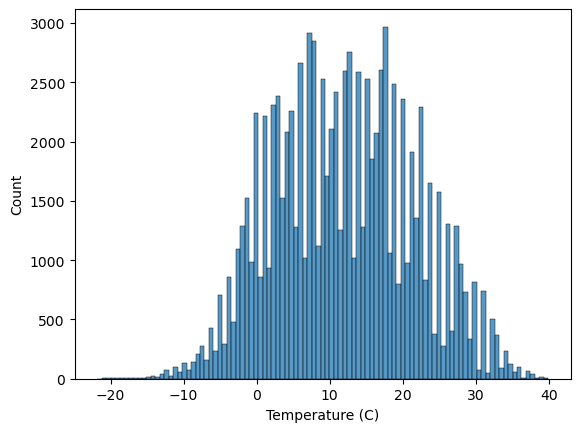

In [7]:
sns.histplot(x='Temperature (C)',data=df)

<Axes: xlabel='Temperature (C)'>

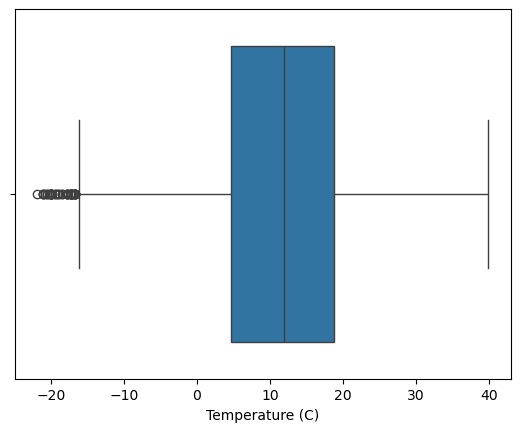

In [8]:
sns.boxplot(x='Temperature (C)',data=df)

<Axes: xlabel='Apparent Temperature (C)'>

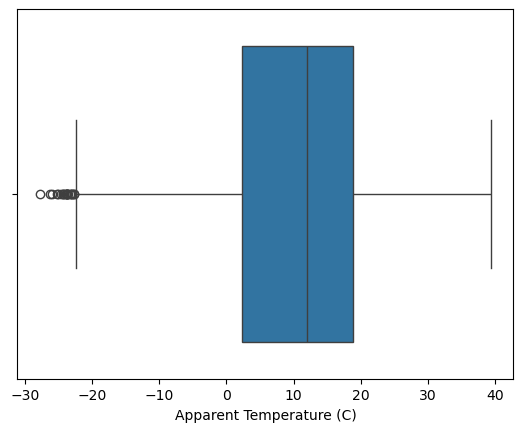

In [9]:
sns.boxplot(x='Apparent Temperature (C)',data=df)
            






<Axes: xlabel='Humidity'>

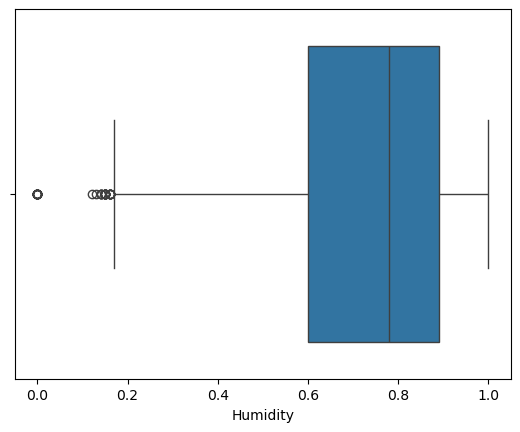

In [10]:
sns.boxplot(x='Humidity',data=df)

* Humidity is mostly distributed in between o.6 and o.9 with the median of 0.8

#### categorical plots 

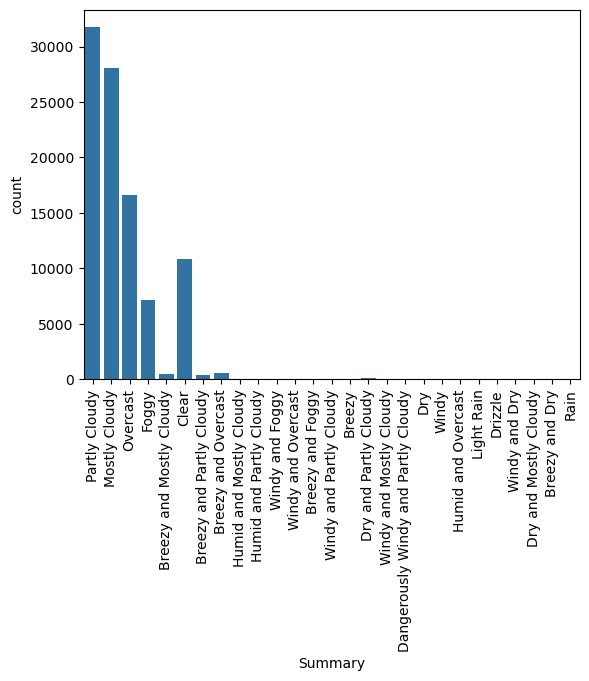

In [11]:
sns.countplot(x='Summary',data=df)
plt.xticks(rotation=90)
plt.show()

The chart shows that “Partly Cloudy,” “Mostly Cloudy,” and “Overcast” are by far the most common weather conditions, while all other categories occur much less frequently. This suggests that the dataset is dominated by cloudy conditions, with rainy, windy, and foggy weather being relatively rare

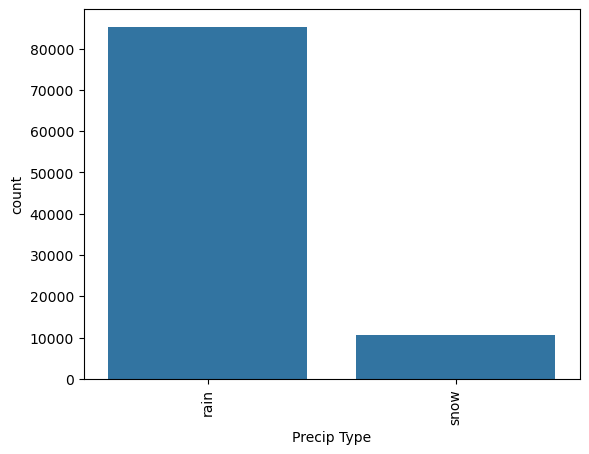

In [12]:
sns.countplot(x='Precip Type',data=df)
plt.xticks(rotation=90)
plt.show()

### Multivariate analysis

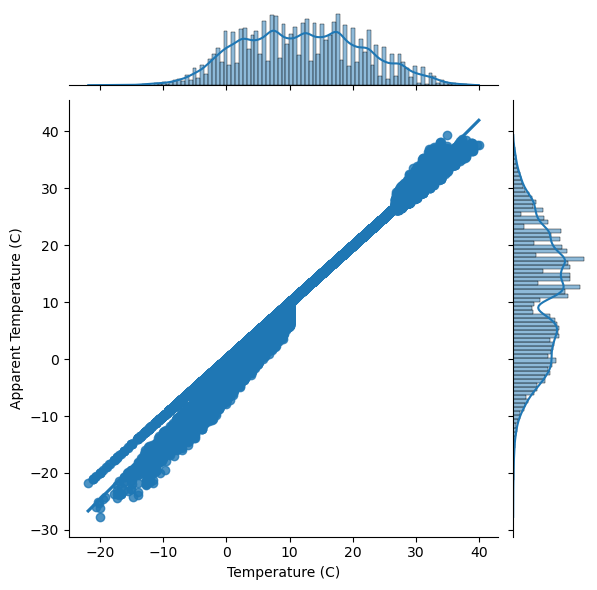

In [13]:
sns.jointplot(x='Temperature (C)',y='Apparent Temperature (C)', data = df,kind='reg')


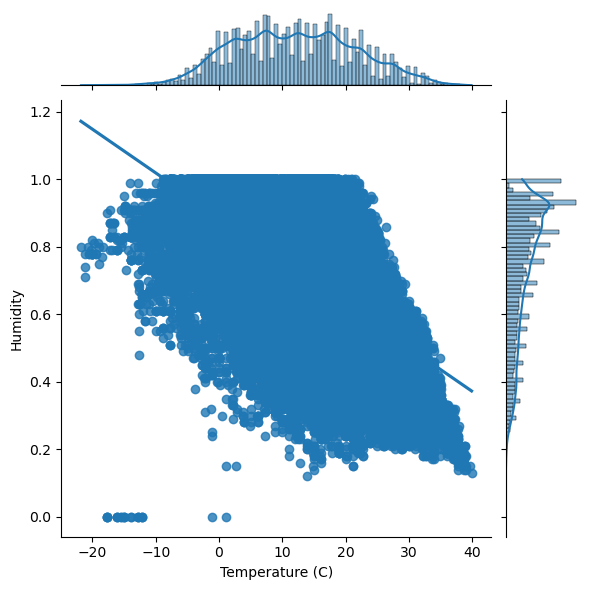

In [14]:
sns.jointplot(x='Temperature (C)',y='Humidity', data = df,kind='reg')

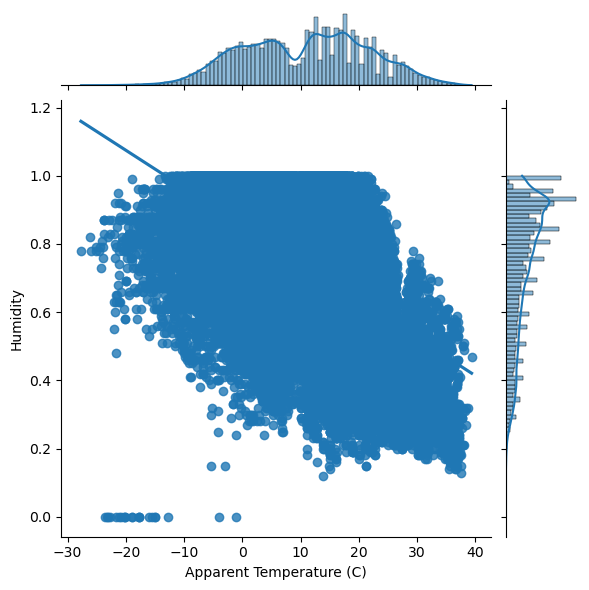

In [15]:
sns.jointplot(x='Apparent Temperature (C)',y='Humidity', data = df,kind='reg')

##### categorical plot

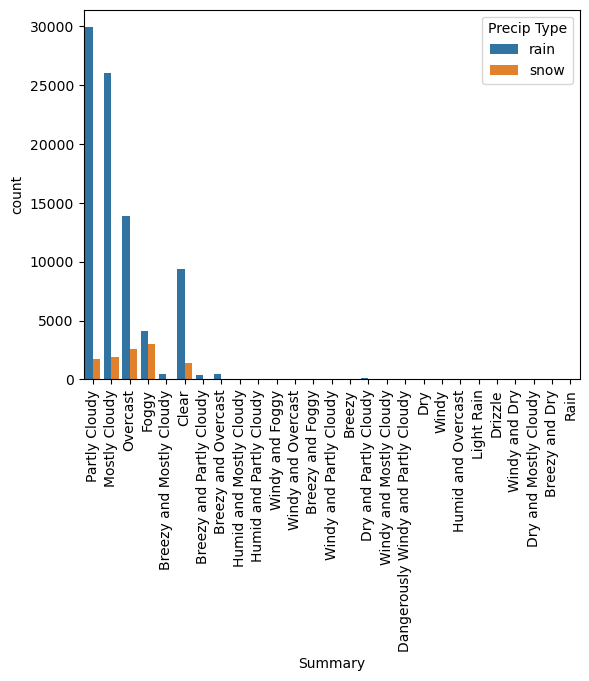

In [16]:
sns.countplot(x='Summary',hue='Precip Type',data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Precip Type', ylabel='Temperature (C)'>

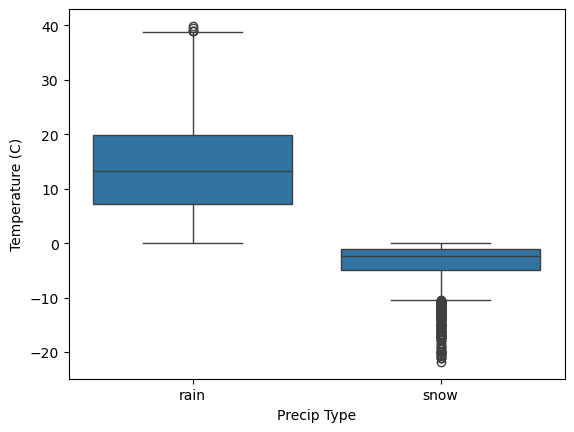

In [17]:
sns.boxplot(x ='Precip Type',y='Temperature (C)', data=df)

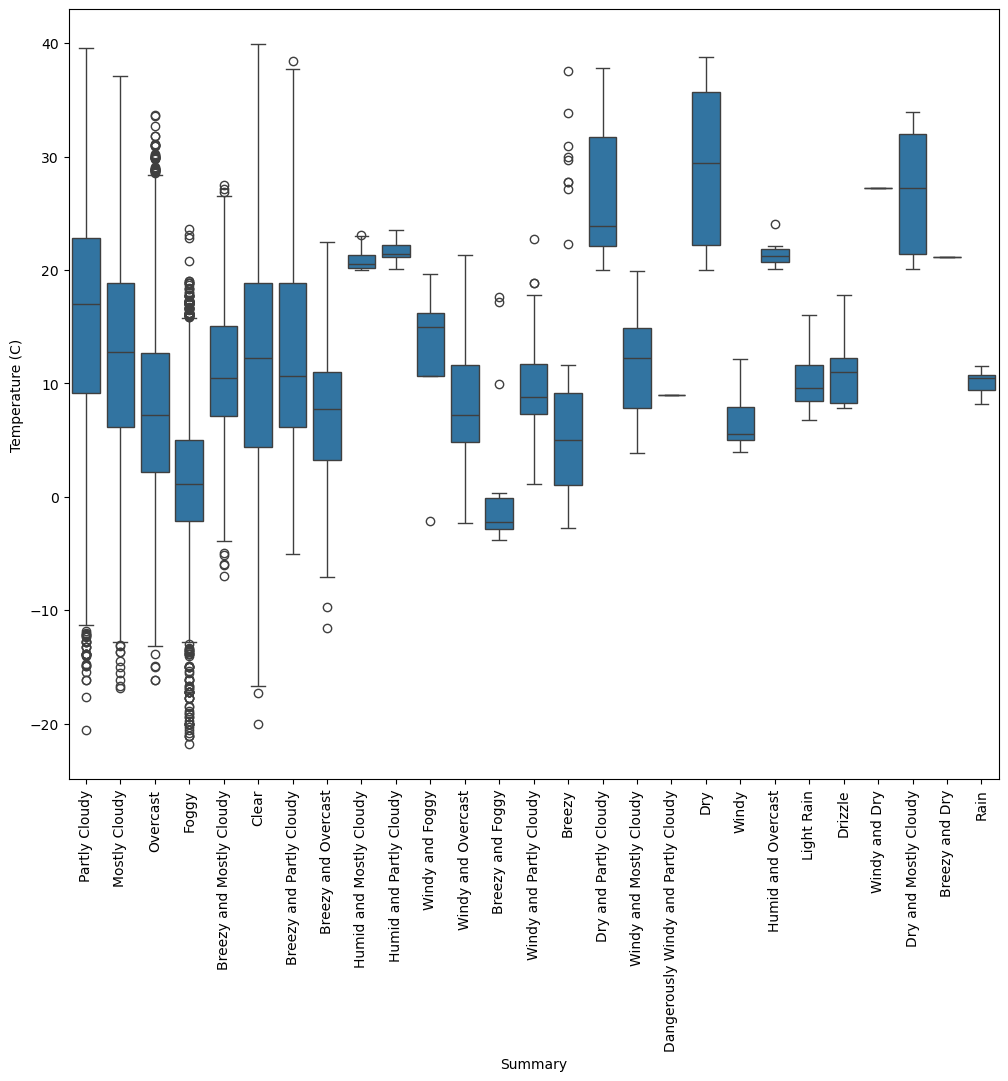

In [18]:
plt.figure(figsize=(12,10)) 
sns.boxplot(x ='Summary',y='Temperature (C)', data=df)
plt.xticks(rotation=90)
plt.show()

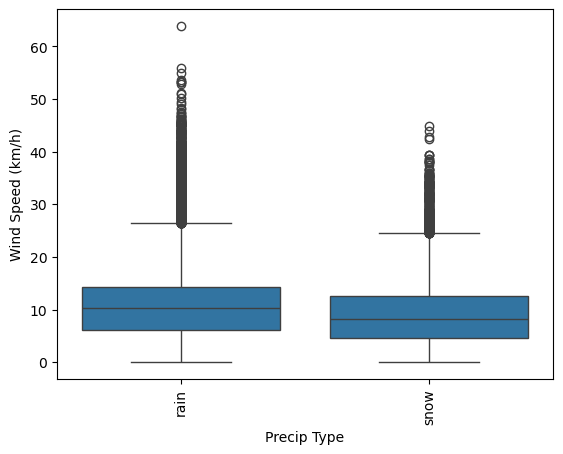

In [19]:
#plt.figure(figsize=(12,10)) 
sns.boxplot(x ='Precip Type',y='Wind Speed (km/h)', data=df)
plt.xticks(rotation=90)
plt.show()

####Average wind speeds are roughly the same for rain and snow.

But rainy conditions occasionally bring stronger winds.

Snow  to occur with slightly calmer wind conditions.

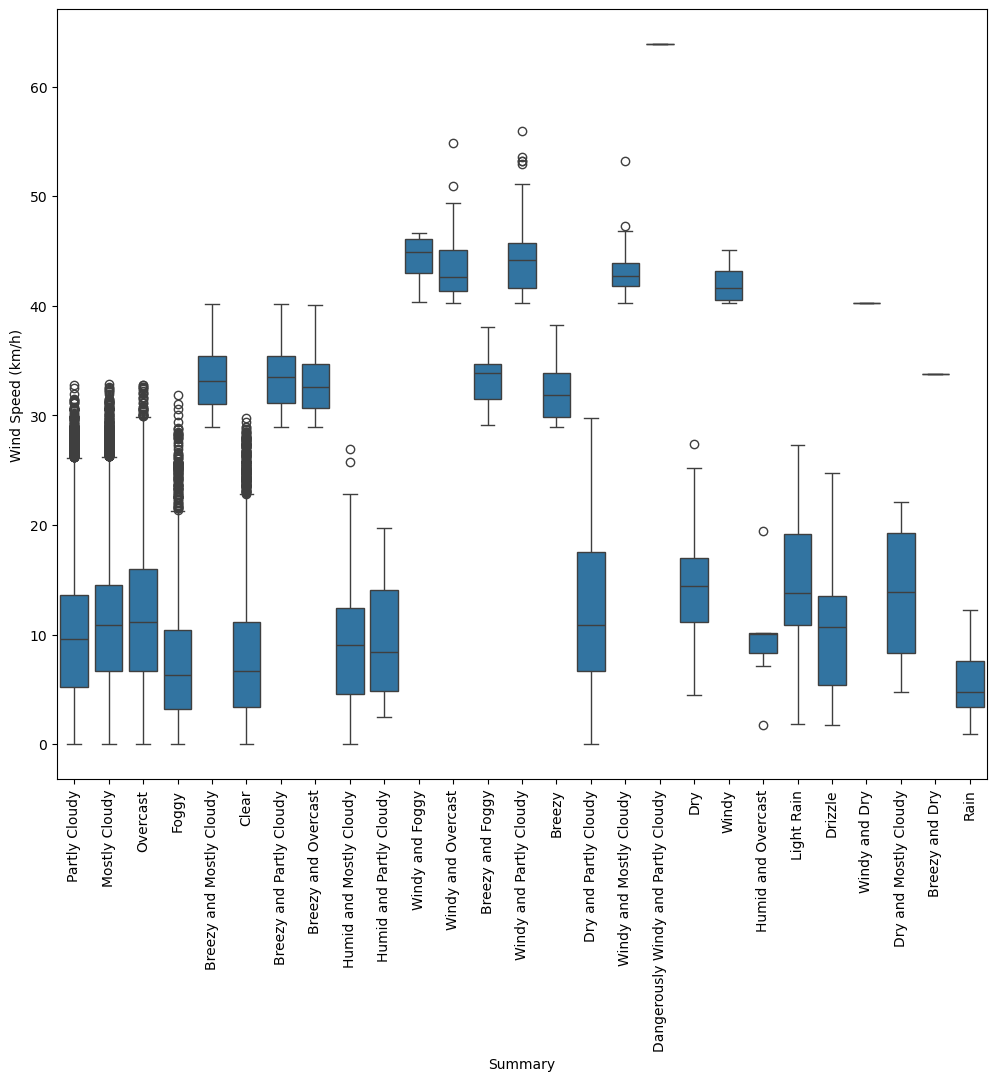

In [20]:
plt.figure(figsize=(12,10)) 
sns.boxplot(x ='Summary',y='Wind Speed (km/h)', data=df)
plt.xticks(rotation=90)
plt.show()

-Windy weather conditions (as named) clearly correlate with higher wind speeds.

-Cloudy or foggy conditions tend to be calmer.

-Rain and humidity produce moderate winds on average.

-The variance in wind speeds is much higher in windy conditions than in calm or cloudy ones

### Data Preprocessing for model training

### Filling the missing values

In [21]:
df['Prep_Type_new'] = df ['Precip Type'].fillna('rain')

## check the missing value

In [22]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
Prep_Type_new                 0
dtype: int64

### Encoding
* label encoding
* one-hot encoding

#### one-hot encoding


In [23]:
df['Prep_Type_new'].unique()

array(['rain', 'snow'], dtype=object)

In [24]:
df_encoded = pd.get_dummies(df, columns=['Summary', 'Precip Type'], drop_first=True)

In [25]:
df_encoded.head()

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,...,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_snow
0,2006-04-01 00:00:00.000 +0200,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,...,False,True,False,False,False,False,False,False,False,False
1,2006-04-01 01:00:00.000 +0200,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,...,False,True,False,False,False,False,False,False,False,False
2,2006-04-01 02:00:00.000 +0200,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,...,False,False,False,False,False,False,False,False,False,False
3,2006-04-01 03:00:00.000 +0200,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,...,False,True,False,False,False,False,False,False,False,False
4,2006-04-01 04:00:00.000 +0200,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,...,False,False,False,False,False,False,False,False,False,False


In [26]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

###### Encoding
* label encoding


In [27]:
le = LabelEncoder()



In [28]:
#  encode 'Summary' column
df['Summary'] = le.fit_transform(df['Summary'])

# encode 'Precip Type':
df['Precip Type'] = le.fit_transform(df['Precip Type'])

# Show the result
print(df[['Summary', 'Precip Type']].head())

   Summary  Precip Type
0       19            0
1       19            0
2       17            0
3       19            0
4       17            0


In [29]:
## mean
mean_temp = df['Temperature (C)'].mean()
print("Mean Temperature:", mean_temp)

Mean Temperature: 11.93267843751188


In [30]:
## median temperature
median_temp = df['Temperature (C)'].median()
print("Median Temperature:", median_temp)

Median Temperature: 12.0


In [31]:
# mode of the weather Summary
mode_summary = df['Summary'].mode()
print("Mode of weather Summary:", mode_summary[0])


Mode of weather Summary: 19


In [32]:

# mode of Temperature
mode_temp = df['Temperature (C)'].mode()
print("Mode of Temperature (C):", mode_temp[0])

Mode of Temperature (C): 7.222222222222222


In [33]:
#  Data cleaning ---
df = df.dropna()  # Remove missing values

In [34]:
# Check the first few values
print(df['Formatted Date'].head())

0    2006-04-01 00:00:00.000 +0200
1    2006-04-01 01:00:00.000 +0200
2    2006-04-01 02:00:00.000 +0200
3    2006-04-01 03:00:00.000 +0200
4    2006-04-01 04:00:00.000 +0200
Name: Formatted Date, dtype: object


In [35]:
#  Convert properly (sometimes the column has a timezone or special format)
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce', utc=True)

In [36]:
#  Verify conversion
print(df['Formatted Date'].dtypes)

datetime64[ns, UTC]


In [37]:

# Now extract hour and month safely
df['Hour'] = df['Formatted Date'].dt.hour
df['Month'] = df['Formatted Date'].dt.month

In [56]:
# Convert to numeric
df['Prep_Type_new'] = le.fit_transform(df['Prep_Type_new'])

In [57]:
#  5. Define features and target ---
X = df.drop(['Temperature (C)', 'Formatted Date', 'Daily Summary'], axis=1, errors='ignore')
y = df['Temperature (C)']

In [77]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'Prep_Type_new', 'Hour',
       'Month'],
      dtype='object')

In [108]:
X =df[[ 'Precip Type','Apparent Temperature (C)']]
y = df['Temperature (C)']

### Train test split

In [109]:
# train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [110]:
X_train.shape

(64623, 2)

In [111]:
X
y_train.shape

(64623,)

In [112]:
X_test.shape

(31830, 2)

In [113]:
y_test.shape

(31830,)

## Training the model

In [141]:
model=LinearRegression() ##.initialize the ML MODEL


In [142]:
model

LinearRegression()

In [143]:
model.fit(X_train,y_train)## TRAINING THE MODEL

LinearRegression()

In [144]:
X_train

,Precip Type,Apparent Temperature (C)
44882,0,13.922222
17058,0,22.744444
3863,0,16.716667
83213,0,28.355556
78875,0,27.005556
...,...,...
6265,0,14.511111
54886,1,-9.983333
76820,0,7.716667
860,0,19.161111


In [145]:
predictions = model.predict(X_test)

In [146]:
predictions

array([27.84812449,  9.40929147, 15.08202229, ...,  8.03780802,
       14.46755838, 20.93663442])

In [147]:
predict_df=pd.DataFrame({'actual':y_test,'predict':predictions})

In [148]:
predict_df

,actual,predict
87206,28.122222,27.848124
33421,10.000000,9.409291
6807,14.400000,15.082022
37340,1.016667,-0.068200
3016,-0.122222,-0.141127
...,...,...
75543,15.094444,15.696486
54060,27.755556,26.196445
45467,7.733333,8.037808
95956,13.705556,14.467558


## evaluating the ML model

In [122]:
mean__scores=mean_absolute_error(y_test,predictions)

In [123]:
mean__scores

0.8835336077344932

In [124]:
mse_scores=mean_squared_error(y_test,predictions)

In [125]:
mse_scores

1.3369594255489083

## model saving

In [127]:
# Save the model
joblib.dump(model, 'temperature_model.joblib')

['temperature_model.joblib']

In [128]:
# Load it later
loaded_model = joblib.load('temperature_model.joblib')

In [129]:
print("✅ Model saved and loaded successfully!")

✅ Model saved and loaded successfully!


## testing save model 

In [130]:
loaded_model

LinearRegression()

In [131]:
preds=loaded_model.predict(X_test)

In [149]:
X.iloc[0]

Precip Type                 0.000000
Apparent Temperature (C)    7.388889
Name: 0, dtype: float64

In [155]:
np.array(X.iloc[0]).ndim

1

In [157]:
two_dim_value=np.array(X.iloc[0]).reshape(1,-1)

In [158]:
two_dim_value.ndim

2

In [160]:
one_pred_value=loaded_model.predict(two_dim_value)

c:\Users\PRINCES\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [161]:
one_pred_value

array([8.87839465])

In [163]:
y.iloc[0]

9.47222222222222